>>## for Boosting algorithyms simple implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as exp
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
import xgboost
xgboostClassifier = xgboost.XGBClassifier()
xgboostRegressor = xgboost.XGBRegressor()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/Ranjit Singh/Desktop/coding/Data Scientist/machine_learning projects/bagging_technique/wine_data.csv')
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df = df.iloc[:,1:]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

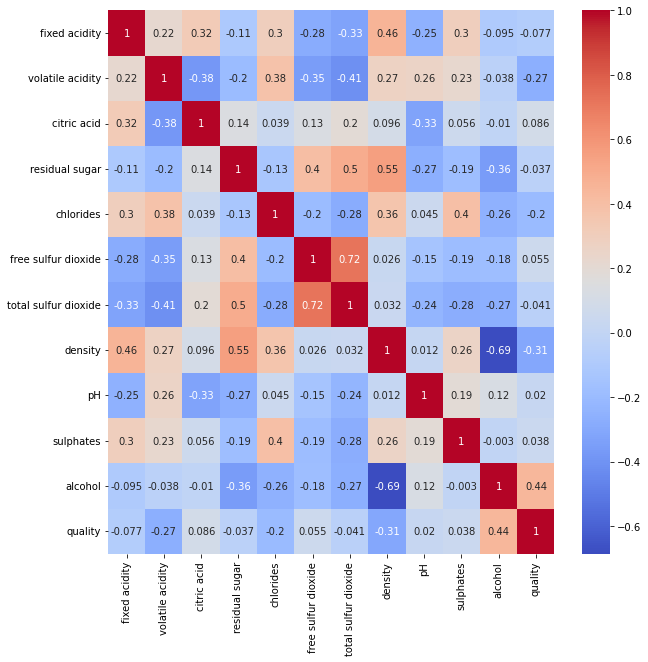

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [9]:
df.corr()['quality']    # pearson correlation

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [10]:
df.corr(method='spearman')['quality']       #spearman correlation

fixed acidity          -0.098154
volatile acidity       -0.257806
citric acid             0.105711
residual sugar         -0.016891
chlorides              -0.295054
free sulfur dioxide     0.086865
total sulfur dioxide   -0.054777
density                -0.322806
pH                      0.032538
sulphates               0.029831
alcohol                 0.446925
quality                 1.000000
Name: quality, dtype: float64

In [11]:
df.corr()['quality'].sort_values(ascending=False)      # in descending order

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [12]:
ax = (df.corr()['quality'].sort_values(ascending=False)).round(2)
ax

quality                 1.00
alcohol                 0.44
citric acid             0.09
free sulfur dioxide     0.06
sulphates               0.04
pH                      0.02
residual sugar         -0.04
total sulfur dioxide   -0.04
fixed acidity          -0.08
chlorides              -0.20
volatile acidity       -0.27
density                -0.31
Name: quality, dtype: float64

In [13]:
ax2 = ax.values
ax2

array([ 1.  ,  0.44,  0.09,  0.06,  0.04,  0.02, -0.04, -0.04, -0.08,
       -0.2 , -0.27, -0.31])

In [14]:
ax.keys()

Index(['quality', 'alcohol', 'citric acid', 'free sulfur dioxide', 'sulphates',
       'pH', 'residual sugar', 'total sulfur dioxide', 'fixed acidity',
       'chlorides', 'volatile acidity', 'density'],
      dtype='object')

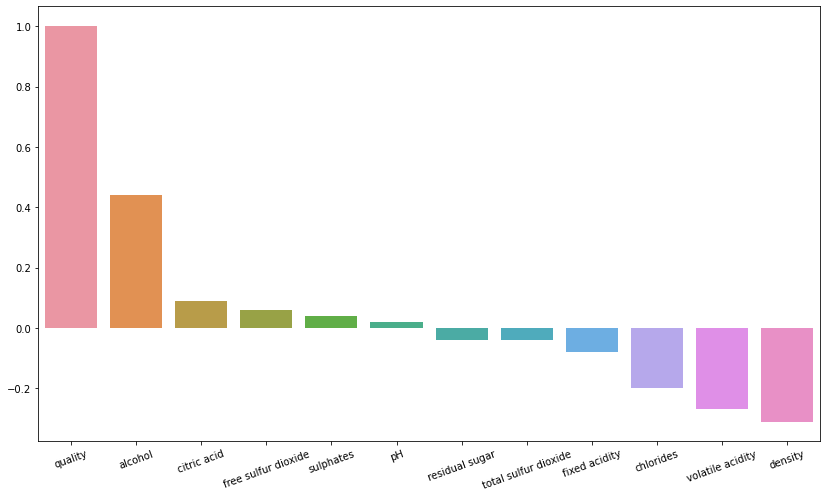

In [15]:

plt.figure(figsize=(14,8))

sns.barplot(x=ax.keys(),y=ax2)
plt.xticks(rotation=20)
plt.show()

In [16]:
for i,j in enumerate(df['quality']):
    if j > 5:
        df['quality'][i]=1
    else:
        df['quality'][i]=0

In [17]:
x = df.drop(['quality'],axis=1)
y = df['quality']

In [18]:
y.value_counts()

1    4113
0    2384
Name: quality, dtype: int64

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

### XGBClassifier

In [31]:
xgbc = xgboost.XGBClassifier()

In [32]:
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [33]:
y_pred2 = xgbc.predict(x_test)

In [87]:
y_test.value_counts()

1    827
0    473
Name: quality, dtype: int64

In [34]:
pd.Series(y_pred2).value_counts()

1    846
0    454
dtype: int64

In [35]:
accuracy_score(y_pred2,y_test)

0.8207692307692308

In [90]:
confusion_matrix(y_pred2,y_test)

array([[347, 107],
       [126, 720]], dtype=int64)

In [36]:
roc_auc_score(y_pred2,y_test)                #roc_auc_score

0.807690505201987

In [38]:
fpr , tpr, threshold = roc_curve(y_pred2,y_test)

In [99]:
xgbc.predict_proba(x_test)[0]

array([0.02570432, 0.9742957 ], dtype=float32)

### AdAdaBoostClassifier

In [21]:
adbst = AdaBoostClassifier()

In [22]:
adbst.fit(x_train,y_train)

AdaBoostClassifier()

In [24]:
adbst.score(x_test,y_test)

0.7592307692307693

In [25]:
adbst.score(x_train,y_train)

0.771406580719646

In [26]:
y_pred = adbst.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.7592307692307693

In [29]:
confusion_matrix(y_test,y_pred)

array([[293, 180],
       [133, 694]], dtype=int64)

In [30]:
print(classification_report(y_test,y_pred))            # support = TP + FP => for 1

#classification report of AdaboostClassifier            # support = TN + FN => for O

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       473
           1       0.79      0.84      0.82       827

    accuracy                           0.76      1300
   macro avg       0.74      0.73      0.73      1300
weighted avg       0.76      0.76      0.76      1300



In [43]:
print(classification_report(y_test,y_pred2))

# classification report of XGBClassifier

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       473
           1       0.85      0.87      0.86       827

    accuracy                           0.82      1300
   macro avg       0.81      0.80      0.80      1300
weighted avg       0.82      0.82      0.82      1300



Thank you